In [1]:
# Part A Data Preparation and Key metrics
import pandas as pd

sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")

sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [2]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
print("Sentiment dataset shape:", sentiment_df.shape)
print("Trades dataset shape:", trades_df.shape)

print("\nSentiment columns:\n", sentiment_df.columns)
print("\nTrades columns:\n", trades_df.columns)

Sentiment dataset shape: (2644, 4)
Trades dataset shape: (211224, 16)

Sentiment columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trades columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [4]:
print("\nSentiment missing values:\n", sentiment_df.isnull().sum())
print("\nTrades missing values:\n", trades_df.isnull().sum())

print("\nSentiment duplicates:", sentiment_df.duplicated().sum())
print("Trades duplicates:", trades_df.duplicated().sum())


Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment duplicates: 0
Trades duplicates: 0


In [5]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

trades_df["Timestamp IST"] = pd.to_datetime(trades_df["Timestamp IST"], dayfirst=True)
trades_df["date"] = trades_df["Timestamp IST"].dt.date
trades_df["date"] = pd.to_datetime(trades_df["date"])
trades_df["date"].head()

0   2024-12-02
1   2024-12-02
2   2024-12-02
3   2024-12-02
4   2024-12-02
Name: date, dtype: datetime64[ns]

In [6]:
sentiment_df = sentiment_df[["date", "value", "classification"]]
sentiment_df.rename(columns={"value": "fear_greed_index"}, inplace=True)

trades_df = trades_df[
    ["Account", "Side", "Size USD", "Closed PnL", "Direction", "Fee", "date"]
]

trades_df.rename(columns={
    "Size USD": "trade_size_usd",
    "Closed PnL": "pnl"
}, inplace=True)

merged_df = pd.merge(trades_df, sentiment_df, on="date", how="inner")

print("Merged dataset shape:", merged_df.shape)
merged_df.head()

Merged dataset shape: (211218, 9)


,Account,Side,trade_size_usd,pnl,Direction,Fee,date,fear_greed_index,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,7872.16,0.0,Buy,0.345404,2024-12-02,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,127.68,0.0,Buy,0.005600,2024-12-02,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,1150.63,0.0,Buy,0.050431,2024-12-02,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,1142.04,0.0,Buy,0.050043,2024-12-02,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,69.75,0.0,Buy,0.003055,2024-12-02,80,Extreme Greed


In [7]:
#1 Daily PnL per trader
daily_pnl_trader = trades_df.groupby(["date", "Account"])["pnl"].sum().reset_index()
daily_pnl_trader.head()

,date,Account,pnl
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


In [8]:
#Win rate per trader
trades_df["win"] = trades_df["pnl"] > 0
win_rate = trades_df.groupby("Account")["win"].mean().reset_index()
win_rate.rename(columns={"win": "win_rate"}, inplace=True)
win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [9]:
#3 Average trade size
avg_trade_size = trades_df.groupby("Account")["trade_size_usd"].mean().reset_index()
avg_trade_size.head()

,Account,trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [10]:
#4 Number of trades per day
trades_per_day = trades_df.groupby("date").size().reset_index(name="num_trades")
trades_per_day.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


In [11]:
#5 Long / Short ratio
long_short_ratio = trades_df["Side"].value_counts(normalize=True)
long_short_ratio

Side
SELL    0.513805
BUY     0.486195
Name: proportion, dtype: float64

In [12]:
# Part B Analysis 
merged_df["win"] = merged_df["pnl"] > 0

def sentiment_group(x):
    if x <= 30:
        return "Fear"
    elif x <= 60:
        return "Neutral"
    else:
        return "Greed"

merged_df["sentiment"] = merged_df["fear_greed_index"].apply(sentiment_group)

In [13]:
performance_by_sentiment = merged_df.groupby("sentiment").agg(
    avg_pnl=("pnl", "mean"),
    total_pnl=("pnl", "sum"),
    win_rate=("win", "mean")
)

print(performance_by_sentiment)

             avg_pnl     total_pnl  win_rate
sentiment                                   
Fear       31.444486  1.381230e+06  0.379730
Greed      54.038403  4.356468e+06  0.424186
Neutral    52.112381  4.516788e+06  0.415188


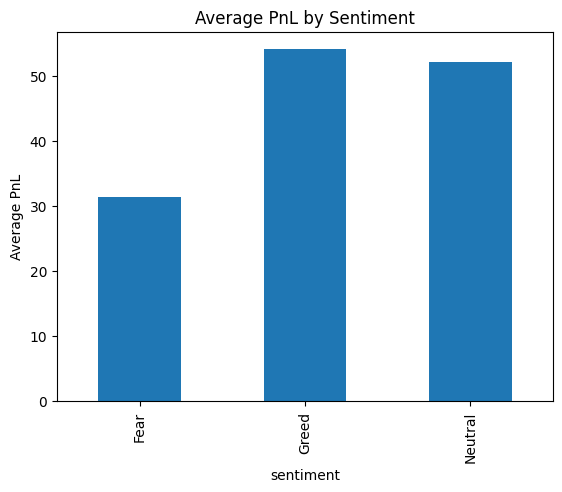

In [14]:
import matplotlib.pyplot as plt

performance_by_sentiment["avg_pnl"].plot(kind="bar")
plt.title("Average PnL by Sentiment")
plt.ylabel("Average PnL")
plt.show()

In [15]:
trades_per_day_sentiment = merged_df.groupby(["date", "sentiment"]).size().reset_index(name="num_trades")

trades_per_day_sentiment.groupby("sentiment")["num_trades"].mean()

sentiment
Fear       744.508475
Greed      283.866197
Neutral    637.308824
Name: num_trades, dtype: float64

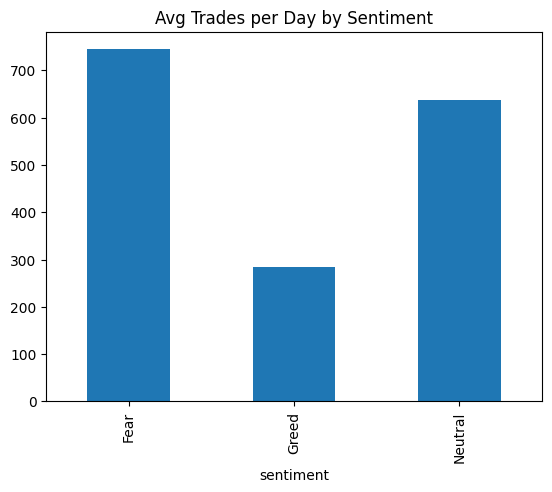

In [16]:
trades_per_day_sentiment.groupby("sentiment")["num_trades"].mean().plot(kind="bar")
plt.title("Avg Trades per Day by Sentiment")
plt.show()

In [17]:
merged_df.groupby("sentiment")["trade_size_usd"].mean()

sentiment
Fear       5696.989140
Greed      3943.730403
Neutral    7186.897697
Name: trade_size_usd, dtype: float64

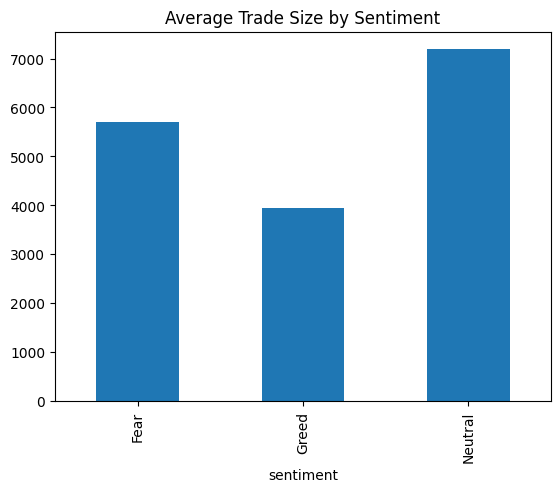

In [18]:
merged_df.groupby("sentiment")["trade_size_usd"].mean().plot(kind="bar")
plt.title("Average Trade Size by Sentiment")
plt.show()

In [19]:
long_short_by_sentiment = pd.crosstab(merged_df["sentiment"], merged_df["Side"], normalize="index")
long_short_by_sentiment

Side,BUY,SELL
sentiment,,
Fear,0.511428,0.488572
Greed,0.466186,0.533814
Neutral,0.491981,0.508019


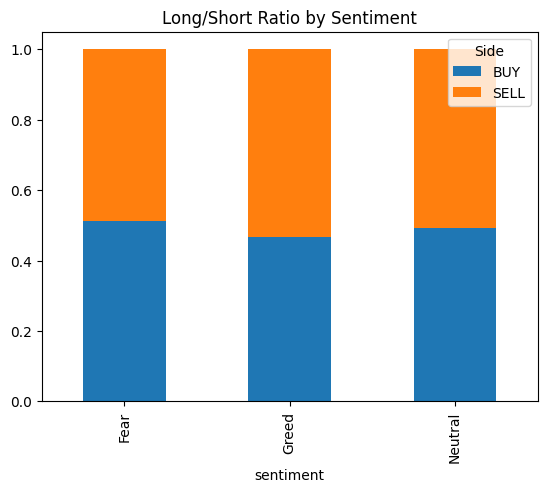

In [20]:
long_short_by_sentiment.plot(kind="bar", stacked=True)
plt.title("Long/Short Ratio by Sentiment")
plt.show()

In [21]:
# Segment 1: Frequent vs Infrequent traders
trade_counts = merged_df.groupby("Account").size()

threshold = trade_counts.median()
frequent_traders = trade_counts[trade_counts > threshold].index
infrequent_traders = trade_counts[trade_counts <= threshold].index

merged_df["freq_segment"] = merged_df["Account"].apply(
    lambda x: "Frequent" if x in frequent_traders else "Infrequent"
)

merged_df.groupby("freq_segment")["pnl"].mean()

freq_segment
Frequent      42.493421
Infrequent    95.216371
Name: pnl, dtype: float64

In [22]:
# Segment 2: Consistent winners vs inconsistent
win_rate_by_trader = merged_df.groupby("Account")["win"].mean()

consistent_winners = win_rate_by_trader[win_rate_by_trader > 0.6].index

merged_df["winner_segment"] = merged_df["Account"].apply(
    lambda x: "Consistent" if x in consistent_winners else "Inconsistent"
)

merged_df.groupby("winner_segment")["pnl"].mean()

winner_segment
Consistent      38.319560
Inconsistent    49.051988
Name: pnl, dtype: float64